<center>
<img src="../img/ml_theme.png">
# Майнор "Интеллектуальный анализ данных" 
# Курс "Введение в программирование"
<img src="../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель ФКН НИУ ВШЭ Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-Share Alike 4.0</a>. Можно использовать в любых целях, но с обязательным упоминанием автора курса и аффилиации.

## Семинар 13.
## Дополнительная часть. Обзор базовых функций Seaborn

**Seaborn** - дополнение Matplotlib с API как для быстрого построения красивых графиков, так и для детальной кастомизации картинок для презентации.

In [1]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
from builtins import *

import pandas as pd
%pylab inline
import seaborn as sns
figsize(12, 8)
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
girls = pd.read_csv('../data/girls.csv')
print(girls.head(10))

      Month  Year  Bust  Waist  Hips  Height  Weight
0  December  1953    91     61    91     165      54
1     March  1954    86     61    89     168      54
2      July  1955    91     61    91     166      52
3  December  1955    91     61    91     166      52
4      July  1956    91     61    86     157      48
5    August  1956    94     61    91     170      55
6   October  1956    91     61    91     166      52
7  November  1956    99     56    91     160      58
8  December  1956    89     58    89     157      48
9   January  1957    91     64    91     165      54


**Гистограммы. Метод <a href="https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html">distplot</a>**

Populating the interactive namespace from numpy and matplotlib


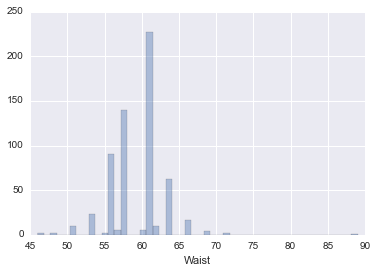

In [3]:
sns.distplot(girls['Waist'], kde=False)

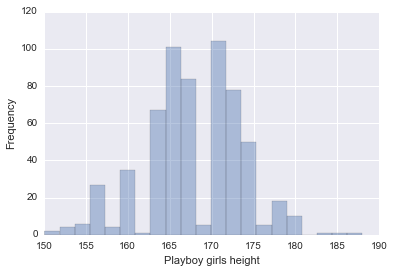

In [4]:
sns.distplot(girls['Height'], kde=False)
sns.axlabel('Playboy girls height', 'Frequency')
sns.set_style('darkgrid')

In [5]:
girls['Year'].describe()

count     604.000000
mean     1983.057947
std        14.843740
min      1953.000000
25%      1970.000000
50%      1983.000000
75%      1996.000000
max      2009.000000
Name: Year, dtype: float64

**Метод <a href="https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.boxplot.html">boxplot</a>**
В наборе данных все признаки численные, так что создадим категорию "weight_cat" из 3 типов веса.

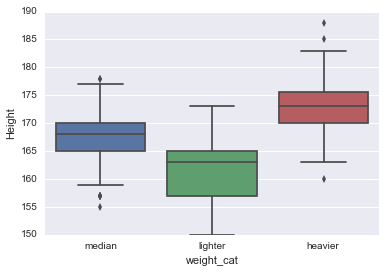

In [6]:
def weight_category(weight):
    return 'heavier' if weight > 54\
            else 'lighter' if weight < 49 else 'median'

girls['weight_cat'] = girls['Weight'].apply(weight_category)
sns.boxplot(x='weight_cat', y='Height', data=girls)

**Метод <a href="http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html">pairplot</a>**

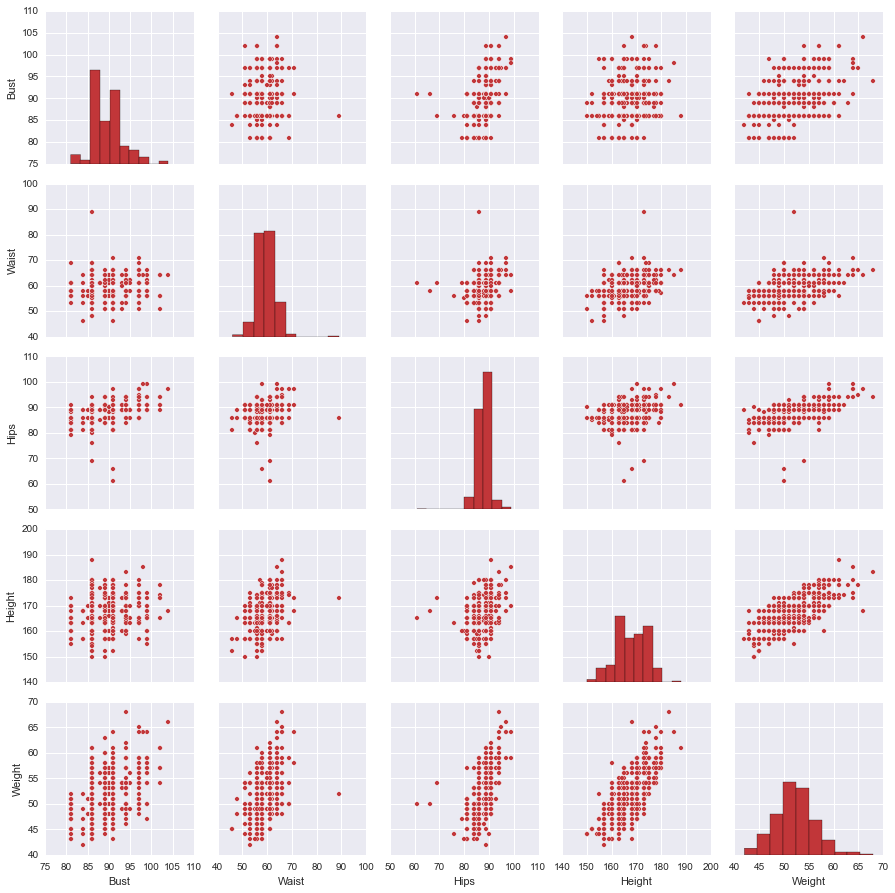

In [7]:
sns.set_palette(sns.color_palette("RdBu"))
sns.pairplot(girls[['Bust', 'Waist', 'Hips', 'Height', 'Weight']])

**Метод <a href="http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.countplot.html">countplot</a>**

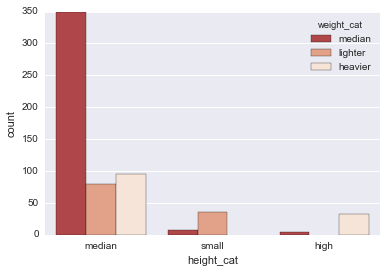

In [12]:
def height_category(height):
    return 'high' if height > 175\
            else 'small' if height < 160 else 'median'

girls['height_cat'] = girls['Height'].apply(height_category)
sns.countplot(x='height_cat', hue='weight_cat', data=girls)